#### Question 1

The "standard error of mean (SEM)" and the "standard deviation (SD)" are both a measurement to variability of data. The standard deviation method measures the spread of data in sample or population around the mean of the dataset, which tells how much datapoints will deviate from the mean. This method is usually used to quantify the variability within the dataset. The standard error of the mean is a measuremnt of the precision of the estimation on the population mean based on analyzing the sample mean, which tells how much the sample mean is expected to deviate from the population mean after taking multiple samples. This method is used to introduce the accurancy of the estimation on the population mean, it decreases as the sample size increases. The SEM will usually be smaller than the SD. 

The standard deviation captures the inherent spread of dispersion of the values within the dataset, which reflects the natural variability. The STand error of the mean captures the percision or reliability of the sample mean when estimating the population mean, which reflects how the sample represents the population.

https://chatgpt.com/share/66f9d5b8-c618-800c-b117-887542c1bee0

This session covered the differences between **standard deviation (SD)** and **standard error of the mean (SEM)**. SD measures the **spread or variability** of data points within a dataset, while SEM assesses the **precision** of the sample mean as an estimate of the population mean. 

Additionally, the concept of **dispersion** was explained, referring to the spread of data points around a central value. Key measures of dispersion such as **range**, **variance**, **standard deviation**, **interquartile range (IQR)**, and **mean absolute deviation (MAD)** were outlined, each providing insights into how data is distributed. Dispersion helps in understanding data variability, consistency, and potential outliers.

#### Question 2

When creating the confidence interval using SEM, the first thing to do is to collect the bootstrapped sample means by generating bootstrapped samples from the original dataset and resample them. The next step is to calculate the mean of bootstrapped sample means. This is the cnter point of the confidence interval and provides estimation of the population mean. Next, calculate the SEM, this step tells you how much the bootstarpped sample means vary from the average. The fourth step is to get the 95% confidence interval by using the cirtical Z value. The critical value tells how far to go from the mean to capture 95% of the bootstrapped sample means. In this case, we take Z = 1.96 since we need 95% of the data lies within 1.96 SD from the mean. The last setp to do is the interpretation, which tells that this confidence interval would include the true population mean. 

https://chatgpt.com/share/66f9db40-64c4-800c-ade3-225c6d2f7654

In this session, the discussion focused on how to apply the **standard error of the mean (SEM)** to construct a **95% confidence interval** for bootstrapped sample means. Key points covered include:

1. **Bootstrapping** involves creating multiple resamples from a dataset to generate estimates of the sample means.
2. The **standard error of the mean (SEM)** quantifies the variability among these bootstrapped sample means, helping to assess the precision of the estimated population mean.
3. A **critical Z-value of 1.96** is used for a 95% confidence interval because it captures 95% of the data under the standard normal distribution.
4. The formula for the confidence interval is: \( \text{CI} = \bar{X}_{\text{bootstrap}} \pm 1.96 \times \text{SEM} \), which produces a range expected to contain the true population mean in 95% of cases.

The explanation also clarified why \( Z = 1.96 \) is chosen for the confidence interval and how this interval reflects uncertainty in the sample mean estimation.

#### Question 3

In order to create a 95% bootstrapped confidence interval without using the SD method, the percentile method should be applied. The first step is to generate bootstrp samples, which is almost the same procedure with the SD method. Next, compute means for each bootstrap samples. Calculate the sample mean for each bootstrap sample in order to get the distribution of bootstrapped sample means. Then, sort the bootstrapped sample means in ascending order. The fourth step is to determine the percentile, which can be completed by excluding 2.5% from both ends of the distribution. The 2.5th and 97.5th percentiles represents the lower and upper bounds of the confidence interval.

#### Question 4

In [15]:
# Imports the numpy library
import numpy as np

# Defines the function bootstrp_cofidence_interval which calculates the boot strap confidence interval
# Parameter 'data' is the array of the sample data 
# Parameter 'n_bootstraps' is the number of bootstrap resamples, which has a default value of 10000
# Parameter 'confidence_level' is the expected confidence level, which has a default value of 0.95
def bootstrap_confidence_interval(data, n_bootstraps=10000, confidence_level=0.95):
    
    # Step 1: Generate bootstrap samples
    # This part of the code generates 10000 resamples (defined by 'n_bootstraps') from the original data array
    # 'replace = True' means that it is possible for the same value to appear multiple times in the same resample
    # '.mean(axis=1)' calculates the mean of each bootstrap samples along axis = 1
    # 'bootstrapped_meams' stores the means from all the bootstrap samples
    bootstrapped_means = np.mean(np.random.choice(data, size=(n_bootstraps, len(data)), replace=True), axis=1)
        
        # Changes to make 
            # In order to change the function to produce bootstrap confidence interval for different parameter
            # We change the 'Step 1: Generate bootstrap samples' for bootstrap_confidence_interval
    
            # Bootstrap confidence interval for median
            # bootstrapped_medians = np.median(np.random.choice(data, size=(n_bootstraps, len(data)), replace=True), axis=1)
            # '.mean(axis=1)' is replaced by '.median(axis=1)', which calculates the median of each bootstrap sample
            
            # Bootstrap confidence interval for variance
            # Replace '.mean(axis=1)' by '.var(axis=1)', which calculates the variance of each bootstrap sample
            
            # Bootstrap confidence interval for the Standard Deviation
            # Replace '.mean(axis=1)' by '.std(axis=1)', which calculates the SD of each bootstrap sample
    
    # Step 2: Compute the confidence interval
    # Calculate the confidence interval's lower bound((1 - 0.95)/2 = 2.5%)
    lower_percentile = (1 - confidence_level) / 2
    # Calculate the confidence interval's upper bound(100% - 2.5% = 97.5%)
    upper_percentile = 1 - lower_percentile
    # Explores the value in 'bootstrapped_means' at the lower_percentile (2.5%)
    ci_lower = np.percentile(bootstrapped_means, lower_percentile * 100)
    # Explores the value in 'bootstrapped_means' at the higher_percentile (97.5%)
    ci_upper = np.percentile(bootstrapped_means, upper_percentile * 100)
    
    # Return the lower and upper bounds of the confidence interval
    return ci_lower, ci_upper

# Example for bootstrap_confidence_interval for mean
data = np.array([82, 75, 88, 90, 78, 85, 92, 76, 89, 84, 91, 87, 77, 93, 80, 82, 79, 88, 86, 81]) # Sample data
confidence_interval = bootstrap_confidence_interval(data)
print(f"95% Bootstrap Confidence Interval mean: {confidence_interval}")

95% Bootstrap Confidence Interval mean: (81.75, 86.5)


https://chatgpt.com/share/66fa0823-3c90-800c-a3cb-e70e9f749e40

### Session Summary:

1. **Bootstrap Confidence Intervals**: We started by discussing a Python function that generates a **95% bootstrap confidence interval** for the population mean based on a sample. The function works by generating bootstrap resamples, calculating the mean of each, and then computing the confidence interval from the percentiles of the resampled means.

2. **Adapting for Other Statistics**: The core bootstrap method can easily be adapted to compute confidence intervals for other statistics like the **median**, **variance**, and **standard deviation**. The only change required is how the statistic is calculated from each bootstrap sample:
   - For the **median**, use `np.median`.
   - For the **variance**, use `np.var`.
   - For the **standard deviation**, use `np.std`.

3. **Code Explanation**: We broke down the original code line-by-line, explaining how the bootstrap resampling works, how the percentiles are calculated, and how the confidence interval is returned.

4. **Sample Dataset**: A sample dataset of test scores was provided for practical use in the bootstrap confidence interval calculations.

5. **Summary of Changes**: The statistical function used (mean, median, variance, etc.) changes depending on the parameter of interest, but the bootstrap methodology remains consistent.



#### Question 5

It is curcial to distinguish between population parameters and sample statistics for confidence interval questions due to the difference between their concepts in statistics. The population paratmeter is a fixed, unkown value that discribes the keypoint values for the whole population; in contrast, a sample statistic is a value calculated from a sample of data, which is only part of the whole population which estimates the population parameter. There are three important points why the distinction matters in confidence interval questions, including the purpose of confidence interval, uncertainty in estimation and sampling variablility. A confidence interval is introduced to estimate the range of the unkonw population parameter based on part of the sample data. In another word, we can't ensure the part of the sample data gathered from the population is able to represent the population data precisely. 

https://chatgpt.com/share/66fb1708-439c-800c-8fad-e3aead2e7692

In this session, the distinction between population parameters and sample statistics was discussed, focusing on their roles in confidence intervals. Population parameters are fixed, often unknown values that describe characteristics of the entire population, such as the population mean or proportion. Sample statistics, on the other hand, are calculated from a sample and serve as estimates of these parameters. Confidence intervals provide a range of plausible values for the population parameter, accounting for the uncertainty that arises from using sample data to estimate population characteristics. This distinction is fundamental to making accurate statistical inferences about a population based on sample data.

#### Question 6

1). \
Bootstrap is a technique applied to simulated sample datas in the way of replacing and resampling. The simulated samples are named "bootstrap samples.", which are created for estimation of the distribution of a statistic about the underlying population. The method is often used when estimating the variablility or confidence intervals for parameters of a datset when the sample size is either too small for analyzing precisely or impossible to analyze the entire population distribution(Ex. the distribution is too complex or unknown). The steps of bootstrap includes original sample, resampling, computing statistic, repeat, estimate distribution, confidence intervals and interpretation. 

2). \
The most important purpose of bootstrap is quantify the uncertainty by estimating the distribution of a statistic from a sample gathered from the specific population. There are some more other purposes, such as estimation of variability and confidence interval, hypothesis testing and model validation. 

3). \
To access whether or not hypothesized guess of the population mean is pausible, the first step to take is to state the hypothesis. For example, state a null hypothesis of mean which mathces your guessed value and also state a alternative hypothesis which does not match to your value. The next step is to resample with bootstrapping, which is done by the steps introduced above(randomly resample from the orgin sample with the same size for each bootstrap sample). Next, calculate the mean for each bootstrap sample and get the bootstrap distribution of sample means. Then, construct the percentile confidence interval using the mean value from the last step. The last step is to compared the hypothesized mean to the confidence interval to check whether it falls inside or outside the interval. If it falls inside the confidence interval, the hypothesized mean would be pausible; if not, then it is not pausible.

https://chatgpt.com/share/66fc2488-6618-800c-9e2f-7458e606cdb3

In this session, bootstrapping was explained as a statistical technique that involves resampling from a dataset to estimate the distribution of a statistic. The primary purpose of bootstrapping is to assess the variability and uncertainty of estimates, construct confidence intervals, and test hypotheses, especially when the underlying population distribution is unknown.

Additionally, the process of using bootstrapping to assess the plausibility of a hypothesized population mean was outlined. By generating a bootstrap distribution of sample means and comparing the hypothesized mean to the confidence interval of the bootstrap distribution, it is possible to determine whether the hypothesized mean is consistent with the observed data. If the hypothesized mean lies outside the confidence interval, it is likely not plausible.

#### Question 7

The reason why a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero:
In this case, the nul hypothesis states that the population mean is 0. In addtion, the confidence interval provides a range of value that are likely to contain the true population mean in sort of confidence. If this confidence interval contains zero, then zero is a pausible value for the population mean, this implies that the observed effect might not be statistically different from zero, which leads to a failure to reject the null hypothesis since the confidence interval does not provide a strong evidence of the population differs from the hypothesized mean. Therefore, if a confidence interval spans on both side of zero, there is enough uncertainty that zero could be the true mean even if zero itself is not sample mean.


Things would lead to the opposite conclusion in this context:
If the confidence intervals does not include the hypothesized mean, then the true population mean would be significantly different from the hypothesized mean.




https://chatgpt.com/share/66fc2a72-6130-800c-8389-9812ce12f96b

A confidence interval overlapping zero indicates that zero is a plausible value for the population parameter, which supports the null hypothesis, suggesting no significant effect. Even if the observed sample mean is not zero, the inclusion of zero in the confidence interval means that the data does not provide sufficient evidence to conclude a statistically significant difference from zero.

Conversely, when the confidence interval does not include zero, the data suggests that the population parameter is significantly different from zero, leading to a rejection of the null hypothesis. This occurs when the confidence interval lies entirely above or below zero, implying a significant effect.

#### Question 8

Introduction:
The task is to determine whether the new vaccine is effective. \
The null hypothesis is set to NO EFFEECT on health care. 

Explanation:
Since the null hypothesis asserts that the vaccine does not cause any difference on health scores, it implies the mean difference between the initial and final scores is zero, in another word, the confidence interval should not overlapping zero. 

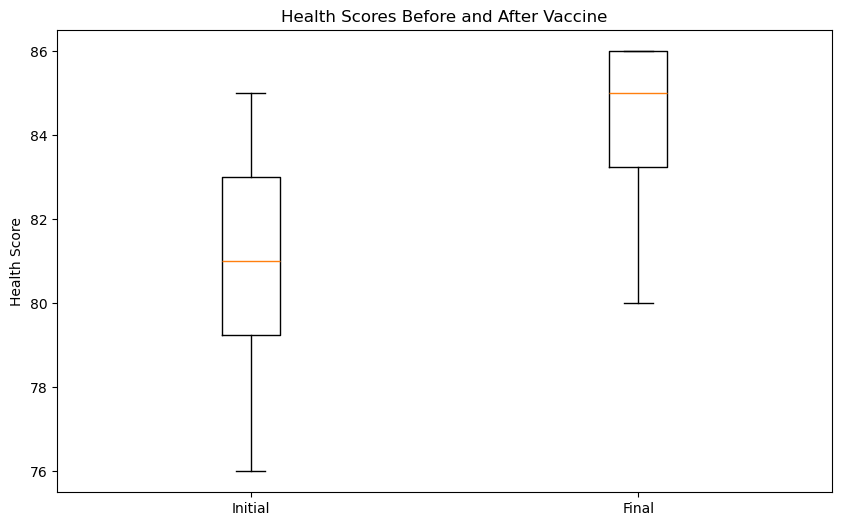

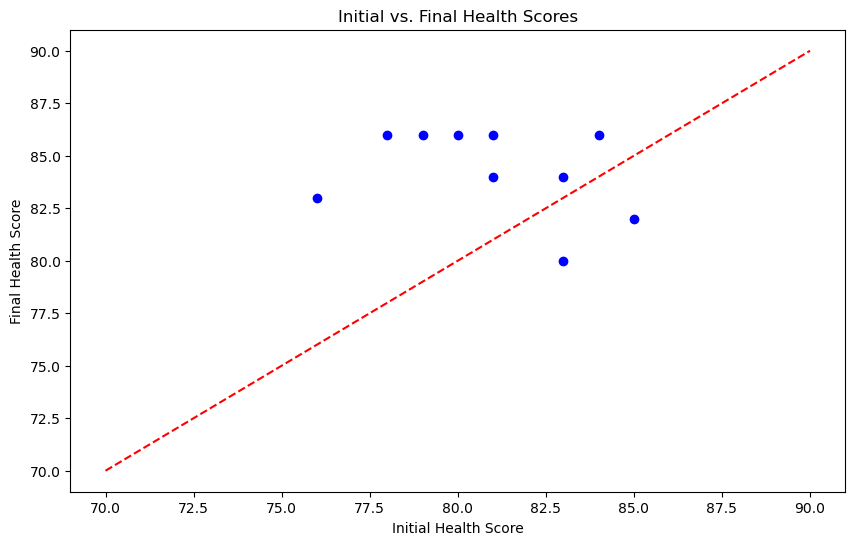

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
data = pd.read_csv('vaccine_data.csv')

# Create visualizations
plt.figure(figsize=(10, 6))
plt.boxplot([data['InitialHealthScore'], data['FinalHealthScore']], labels=['Initial', 'Final'])
plt.title('Health Scores Before and After Vaccine')
plt.ylabel('Health Score')
plt.show()

# Scatter plot of Initial vs. Final Health Score
plt.figure(figsize=(10, 6))
plt.scatter(data['InitialHealthScore'], data['FinalHealthScore'], color='blue')
plt.plot([70, 90], [70, 90], color='red', linestyle='--')  # Line of no change
plt.title('Initial vs. Final Health Scores')
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.show()


In [4]:
from scipy.stats import ttest_rel

# Calculate the differences
data['Difference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Paired t-test
t_stat, p_value = ttest_rel(data['FinalHealthScore'], data['InitialHealthScore'])
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 2.5900615612703937, P-value: 0.02921052381549256


In [5]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Function to perform bootstrap sampling
def bootstrap_means(data, n_iterations=1000):
    means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data['Difference'], size=len(data), replace=True)
        means.append(np.mean(sample))
    return np.percentile(means, [2.5, 97.5]), np.mean(means)

# Bootstrap analysis
ci, mean_difference = bootstrap_means(data)
print(f'95% Confidence Interval for the mean difference: {ci}')
print(f'Bootstrapped Mean Difference: {mean_difference}')


95% Confidence Interval for the mean difference: [0.7 5.5]
Bootstrapped Mean Difference: 3.3075


Findings: \
As shown on the graph, the mean of the final health score has improved by 3.3075 comparing to the original data with a 95% confidence interval for the mean difference not overalapping zero. 

Conclusion: \
Since the mean of the final health score improves and the CI for the improvement does not overlap zero, the new vaccine is effective to imporve the health situation.

https://chatgpt.com/share/66fc2a72-6130-800c-8389-9812ce12f96b

In this session, the approach to the Vaccine Data Analysis Assignment was outlined. The problem centers around evaluating the effectiveness of AliTech's new vaccine by analyzing changes in health scores before and after vaccination. The null hypothesis posits that the vaccine has no effect, meaning there is no significant change in health scores. 

Steps were provided to visually compare initial and final health scores, including using box plots, scatter plots, and bar charts. Quantitative analysis methods, such as the paired t-test and bootstrapping, were explained to assess statistical significance. Sample code was provided for both data visualization and analysis.

Additionally, instructions were given on how to create a CSV file containing the provided dataset using Python and the pandas library. This session established a clear structure for the analysis and report, emphasizing clarity in methodology and interpretation of results.

#### Question 9

Yes. 

### Chatlog Histories

https://chatgpt.com/share/66f9d5b8-c618-800c-b117-887542c1bee0
This session covered the differences between standard deviation (SD) and standard error of the mean (SEM). SD measures the spread or variability of data points within a dataset, while SEM assesses the precision of the sample mean as an estimate of the population mean.
Additionally, the concept of dispersion was explained, referring to the spread of data points around a central value. Key measures of dispersion such as range, variance, standard deviation, interquartile range (IQR), and mean absolute deviation (MAD) were outlined, each providing insights into how data is distributed. Dispersion helps in understanding data variability, consistency, and potential outliers.

https://chatgpt.com/share/66f9db40-64c4-800c-ade3-225c6d2f7654
In this session, the discussion focused on how to apply the standard error of the mean (SEM) to construct a 95% confidence interval for bootstrapped sample means. Key points covered include:
Bootstrapping involves creating multiple resamples from a dataset to generate estimates of the sample means.
The standard error of the mean (SEM) quantifies the variability among these bootstrapped sample means, helping to assess the precision of the estimated population mean.
A critical Z-value of 1.96 is used for a 95% confidence interval because it captures 95% of the data under the standard normal distribution.
The formula for the confidence interval is: ( \text{CI} = \bar{X}_{\text{bootstrap}} \pm 1.96 \times \text{SEM} ), which produces a range expected to contain the true population mean in 95% of cases.
The explanation also clarified why ( Z = 1.96 ) is chosen for the confidence interval and how this interval reflects uncertainty in the sample mean estimation.

https://chatgpt.com/share/66fa0823-3c90-800c-a3cb-e70e9f749e40
Session Summary:
Bootstrap Confidence Intervals: We started by discussing a Python function that generates a 95% bootstrap confidence interval for the population mean based on a sample. The function works by generating bootstrap resamples, calculating the mean of each, and then computing the confidence interval from the percentiles of the resampled means.
Adapting for Other Statistics: The core bootstrap method can easily be adapted to compute confidence intervals for other statistics like the median, variance, and standard deviation. The only change required is how the statistic is calculated from each bootstrap sample:
For the median, use np.median.
For the variance, use np.var.
For the standard deviation, use np.std.
Code Explanation: We broke down the original code line-by-line, explaining how the bootstrap resampling works, how the percentiles are calculated, and how the confidence interval is returned.
Sample Dataset: A sample dataset of test scores was provided for practical use in the bootstrap confidence interval calculations.
Summary of Changes: The statistical function used (mean, median, variance, etc.) changes depending on the parameter of interest, but the bootstrap methodology remains consistent.

https://chatgpt.com/share/66fa0823-3c90-800c-a3cb-e70e9f749e40
Session Summary:
Bootstrap Confidence Intervals: We started by discussing a Python function that generates a 95% bootstrap confidence interval for the population mean based on a sample. The function works by generating bootstrap resamples, calculating the mean of each, and then computing the confidence interval from the percentiles of the resampled means.
Adapting for Other Statistics: The core bootstrap method can easily be adapted to compute confidence intervals for other statistics like the median, variance, and standard deviation. The only change required is how the statistic is calculated from each bootstrap sample:
For the median, use np.median.
For the variance, use np.var.
For the standard deviation, use np.std.
Code Explanation: We broke down the original code line-by-line, explaining how the bootstrap resampling works, how the percentiles are calculated, and how the confidence interval is returned.
Sample Dataset: A sample dataset of test scores was provided for practical use in the bootstrap confidence interval calculations.
Summary of Changes: The statistical function used (mean, median, variance, etc.) changes depending on the parameter of interest, but the bootstrap methodology remains consistent.

https://chatgpt.com/share/66fb1708-439c-800c-8fad-e3aead2e7692
In this session, the distinction between population parameters and sample statistics was discussed, focusing on their roles in confidence intervals. Population parameters are fixed, often unknown values that describe characteristics of the entire population, such as the population mean or proportion. Sample statistics, on the other hand, are calculated from a sample and serve as estimates of these parameters. Confidence intervals provide a range of plausible values for the population parameter, accounting for the uncertainty that arises from using sample data to estimate population characteristics. This distinction is fundamental to making accurate statistical inferences about a population based on sample data.

https://chatgpt.com/share/66fc2488-6618-800c-9e2f-7458e606cdb3
In this session, bootstrapping was explained as a statistical technique that involves resampling from a dataset to estimate the distribution of a statistic. The primary purpose of bootstrapping is to assess the variability and uncertainty of estimates, construct confidence intervals, and test hypotheses, especially when the underlying population distribution is unknown.
Additionally, the process of using bootstrapping to assess the plausibility of a hypothesized population mean was outlined. By generating a bootstrap distribution of sample means and comparing the hypothesized mean to the confidence interval of the bootstrap distribution, it is possible to determine whether the hypothesized mean is consistent with the observed data. If the hypothesized mean lies outside the confidence interval, it is likely not plausible.

https://chatgpt.com/share/66fc2488-6618-800c-9e2f-7458e606cdb3
In this session, bootstrapping was explained as a statistical technique that involves resampling from a dataset to estimate the distribution of a statistic. The primary purpose of bootstrapping is to assess the variability and uncertainty of estimates, construct confidence intervals, and test hypotheses, especially when the underlying population distribution is unknown.
Additionally, the process of using bootstrapping to assess the plausibility of a hypothesized population mean was outlined. By generating a bootstrap distribution of sample means and comparing the hypothesized mean to the confidence interval of the bootstrap distribution, it is possible to determine whether the hypothesized mean is consistent with the observed data. If the hypothesized mean lies outside the confidence interval, it is likely not plausible.

https://chatgpt.com/share/66fc2a72-6130-800c-8389-9812ce12f96b
In this session, the approach to the Vaccine Data Analysis Assignment was outlined. The problem centers around evaluating the effectiveness of AliTech's new vaccine by analyzing changes in health scores before and after vaccination. The null hypothesis posits that the vaccine has no effect, meaning there is no significant change in health scores.
Steps were provided to visually compare initial and final health scores, including using box plots, scatter plots, and bar charts. Quantitative analysis methods, such as the paired t-test and bootstrapping, were explained to assess statistical significance. Sample code was provided for both data visualization and analysis.
Additionally, instructions were given on how to create a CSV file containing the provided dataset using Python and the pandas library. This session established a clear structure for the analysis and report, emphasizing clarity in methodology and interpretation of results.